[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10000
    # data points      = 1200
    # variables        = 4
    chi-square         = 39.5848915
    reduced chi-square = 0.03309774
    Akaike info crit   = -4085.95518
    Bayesian info crit = -4065.59487
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amp: -9903173.23 (init = 2689.164)
    cen:  756.899674 (init = 600.1184)
    wid:  9020.13292 (init = 50)
    h:    448.360013 (init = 10)


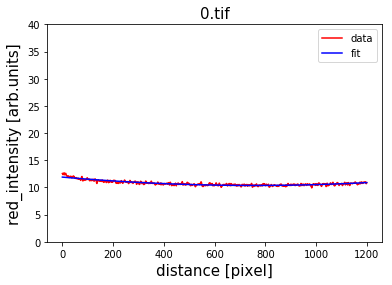

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10000
    # data points      = 1200
    # variables        = 4
    chi-square         = 57.2929369
    reduced chi-square = 0.04790379
    Akaike info crit   = -3642.27938
    Bayesian info crit = -3621.91907
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amp: -10245224.6 (init = 2689.164)
    cen:  678.462110 (init = 600.1184)
    wid:  8755.24280 (init = 50)
    h:    478.298885 (init = 10)


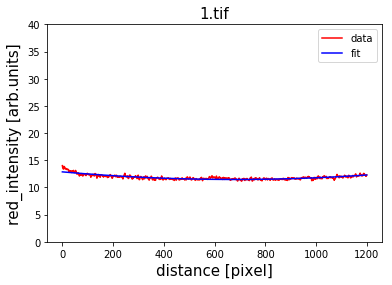

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 1200
    # variables        = 4
    chi-square         = 191.983906
    reduced chi-square = 0.16052166
    Akaike info crit   = -2191.19835
    Bayesian info crit = -2170.83804
[[Variables]]
    amp:  160.811106 +/- 5.03107903 (3.13%) (init = 2689.164)
    cen:  607.166375 +/- 0.89007737 (0.15%) (init = 600.1184)
    wid:  26.2045826 +/- 0.90936170 (3.47%) (init = 50)
    h:    10.9756158 +/- 0.01230226 (0.11%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) =  0.601
    C(amp, h)   = -0.341
    C(wid, h)   = -0.205


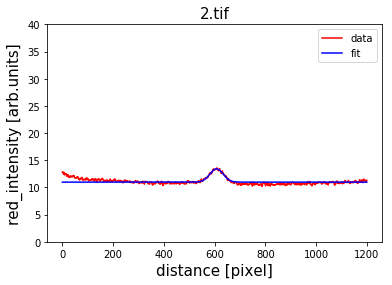

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 1200
    # variables        = 4
    chi-square         = 269.245922
    reduced chi-square = 0.22512201
    Akaike info crit   = -1785.34200
    Bayesian info crit = -1764.98169
[[Variables]]
    amp:  662.497004 +/- 6.90926011 (1.04%) (init = 2689.164)
    cen:  604.553939 +/- 0.37624651 (0.06%) (init = 600.1184)
    wid:  33.8921770 +/- 0.38716912 (1.14%) (init = 50)
    h:    10.5718275 +/- 0.01485776 (0.14%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) =  0.609
    C(amp, h)   = -0.388
    C(wid, h)   = -0.236


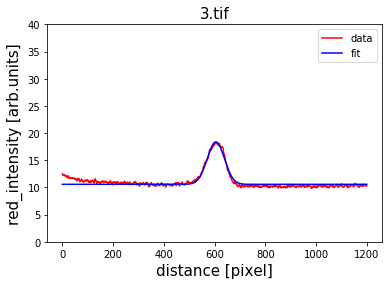

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 1200
    # variables        = 4
    chi-square         = 394.983617
    reduced chi-square = 0.33025386
    Akaike info crit   = -1325.47906
    Bayesian info crit = -1305.11875
[[Variables]]
    amp:  1055.58294 +/- 8.37161026 (0.79%) (init = 2689.164)
    cen:  609.500394 +/- 0.28627831 (0.05%) (init = 600.1184)
    wid:  33.9130600 +/- 0.29459524 (0.87%) (init = 50)
    h:    10.3333226 +/- 0.01799669 (0.17%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) =  0.609
    C(amp, h)   = -0.388
    C(wid, h)   = -0.236


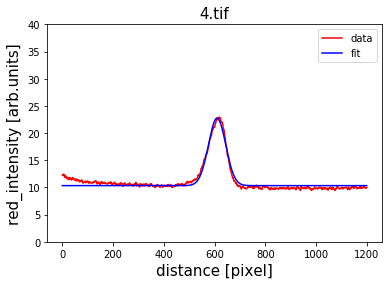

In [31]:
import skimage.measure
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import GaussianModel
from scipy.optimize import curve_fit
from numpy import exp, loadtxt, pi, sqrt
from lmfit import Model
from lmfit.models import ExponentialModel, GaussianModel
import sys
from tqdm import tqdm
import math

for i in range(0,5):

    fldr = '/home/sooyeon/polarization/data/taesun/four_way_clover/'
    name = '.tif'
    img = Image.open(fldr+str(i)+name)
    I = np.array(img)
    R=skimage.measure.profile_line(I,(520,1),(520,1200),linewidth=100,order=1,mode='constant',cval=0) 
    plt.plot(R[: ,0],'r',label='data')
    plt.xlabel('distance [pixel]', fontsize=15)
    plt.ylabel('red_intensity [arb.units]', fontsize=15)
    plt.ylim(0,40)
    plt.title(str(i)+name, fontsize=15)
    
    y = R[: ,0]
    y = y.astype(np.float32)
    x = np.arange(0,1200)
    
    #fitting start  
    def gaussian(x, amp, cen, wid,h):
        return ((amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))+h)


    mod = Model(gaussian)
    result = mod.fit(y, x=x, amp=2689.16428 , cen=600.118408, wid=50,h=10)

    print(result.fit_report())

    plt.plot(x,result.best_fit,'b', label='fit')
    plt.legend()
    plt.show()